In [13]:
import pandas as pd

# Leer archivo CSV
ruta_archivo = "Client_segment_Limpio2.csv"  # Cambia por tu archivo
try:
    df = pd.read_csv(ruta_archivo, sep=";", encoding="utf-8")
    print("Archivo cargado correctamente.")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    exit()

# Identificar las columnas numéricas con comas decimales
columnas_con_coma = ["Digital_encuesta"]

# Convertir las comas decimales a puntos
for columna in columnas_con_coma:
    try:
        if columna in df.columns:
            # Reemplazar comas por puntos y convertir a float
            df[columna] = df[columna].str.replace(",", ".").str.strip()
            df[columna] = pd.to_numeric(df[columna], errors="coerce")  # Convertir a número
            print(f"Columna '{columna}' convertida correctamente.")
        else:
            print(f"Advertencia: la columna '{columna}' no existe en los datos.")
    except Exception as e:
        print(f"Error al procesar la columna '{columna}': {e}")

# Vista previa de los datos procesados
print("\nVista previa del DataFrame:")
print(df.head())

# Verificar valores nulos en las columnas convertidas
print("\nValores nulos detectados después de la conversión:")
print(df[columnas_con_coma].isnull().sum())


Archivo cargado correctamente.
Columna 'Digital_encuesta' convertida correctamente.

Vista previa del DataFrame:
   Unnamed: 0    ID Genero Casado  Edad Graduado    Profesion  \
0           0  CLI2      M     No    24       No  Funcionario   
1           1  CLI3      F     Si    42       Si    Ingeniero   
2           2  CLI4      F     Si    74       Si    Ingeniero   
3           3  CLI5      M     Si    74       Si    Servicios   
4           4  CLI6      F     Si    44       Si        Otros   

  Experiencia laboral Gastoscore  Family_Size  anno_nacimiento    Generacion  \
0            <10annos       Bajo            4             2000  Generacion Z   
1            +20annos      Medio            3             1982   Millennials   
2            +20annos       Bajo            1             1950  Generacion X   
3            +20annos       Alto            2             1950  Generacion X   
4            +20annos       Alto            6             1980  Generacion X   

   Ingresos anu

c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


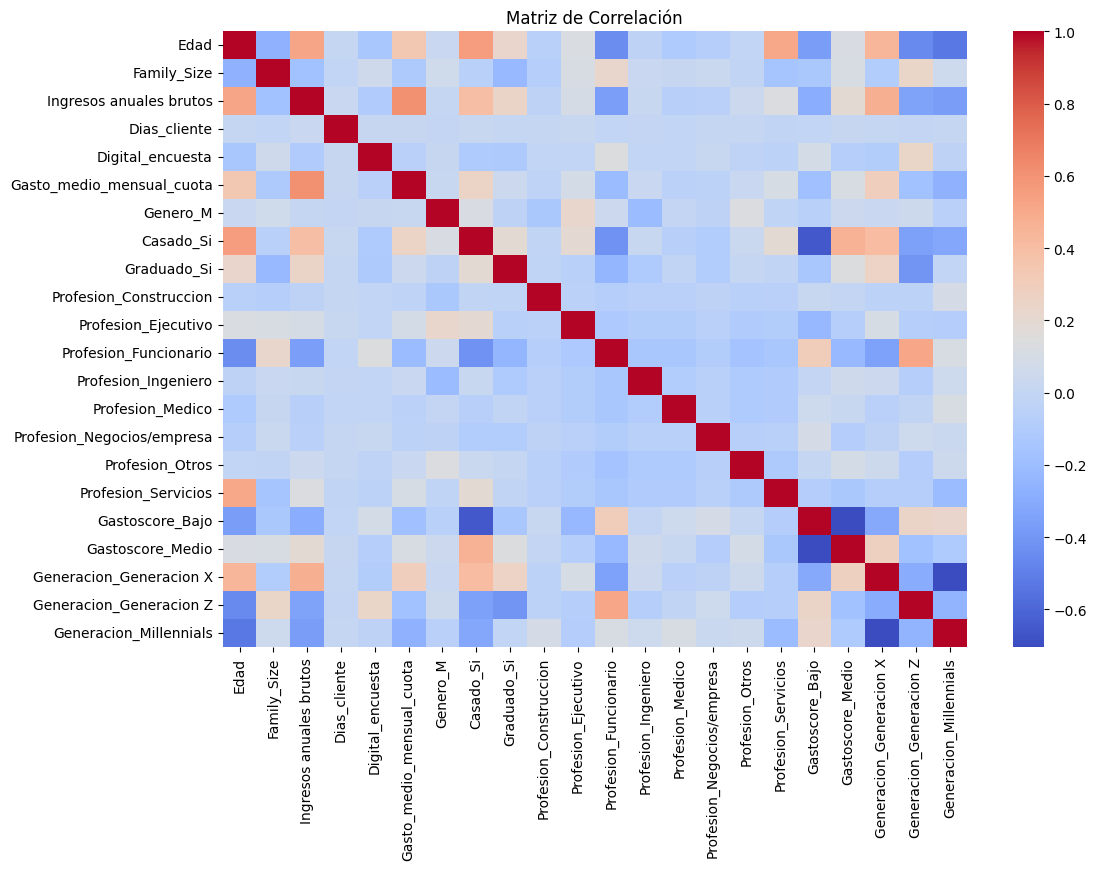

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Variables a excluir
variables_excluir = ['ID', 'Abandono', 'anno_nacimiento','Provincia']  # Excluir redundantes y supervisadas
df = df.drop(columns=variables_excluir)

# 2. Identificación de columnas numéricas y categóricas
variables_numericas = ['Edad', 'Family_Size', 'Ingresos anuales brutos', 'Dias_cliente', 'Digital_encuesta', 'Gasto_medio_mensual_cuota']
variables_categoricas = ['Genero', 'Casado', 'Graduado', 'Profesion', 'Gastoscore','Generacion']

# 3. Normalización de variables numéricas
scaler = StandardScaler()
df[variables_numericas] = scaler.fit_transform(df[variables_numericas])

# 4. Codificación de variables categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
categorical_encoded = encoder.fit_transform(df[variables_categoricas])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(variables_categoricas))

# Combinar datos normalizados y codificados
df_final = pd.concat([df[variables_numericas], categorical_df], axis=1)

# 5. Verificación de correlaciones
correlation_matrix = df_final.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

# (Opcional) Elimina variables altamente correlacionadas (> 0.9)
# Puedes analizar y eliminar columnas con alta correlación si es necesario.


c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


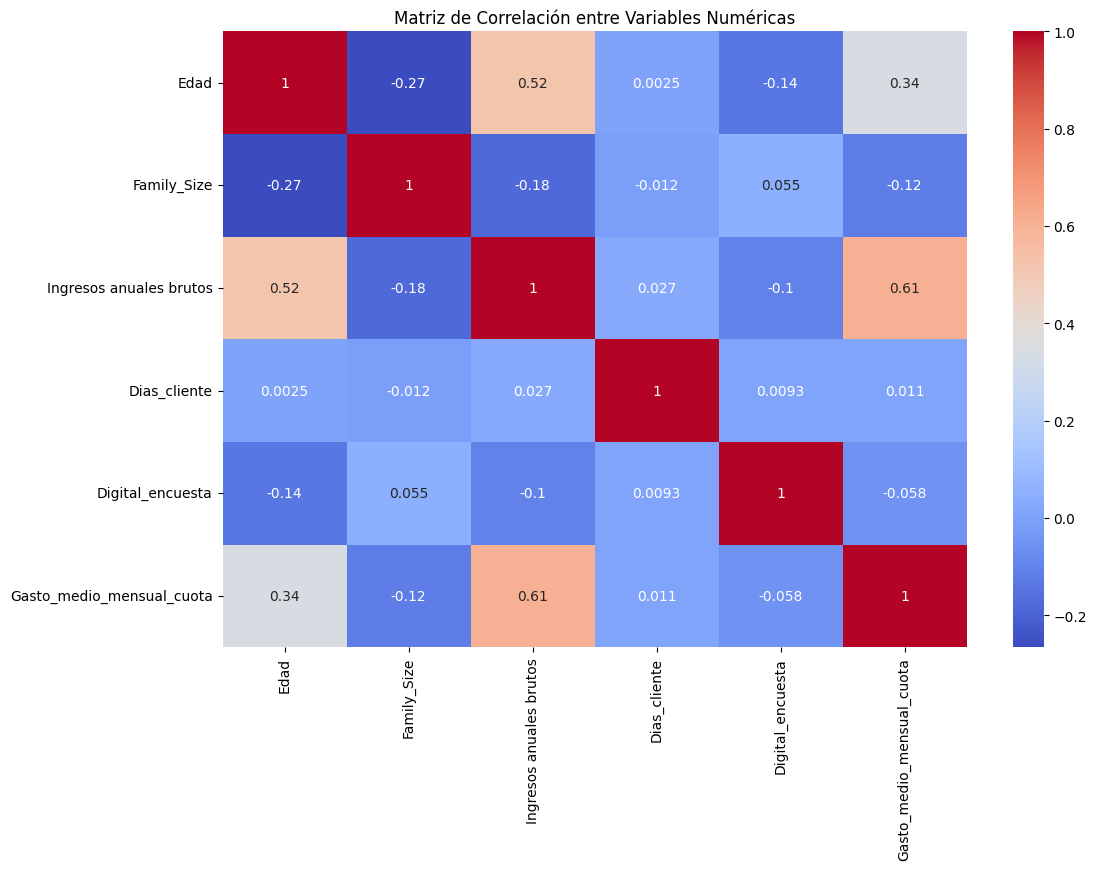

Matriz de Cramér's V entre Variables Categóricas:
              Genero    Casado  Graduado Profesion Gastoscore Generacion
Genero      0.999813  0.115481  0.038254  0.354066   0.060729   0.065004
Casado      0.115481  0.999809  0.191175  0.493555   0.656986   0.562161
Graduado    0.038254  0.191175  0.999804  0.400715   0.146002   0.429729
Profesion   0.354066  0.493555  0.400715       1.0   0.431041   0.499984
Gastoscore  0.060729  0.656986  0.146002  0.431041        1.0    0.34407
Generacion  0.065004  0.562161  0.429729  0.499984    0.34407        1.0


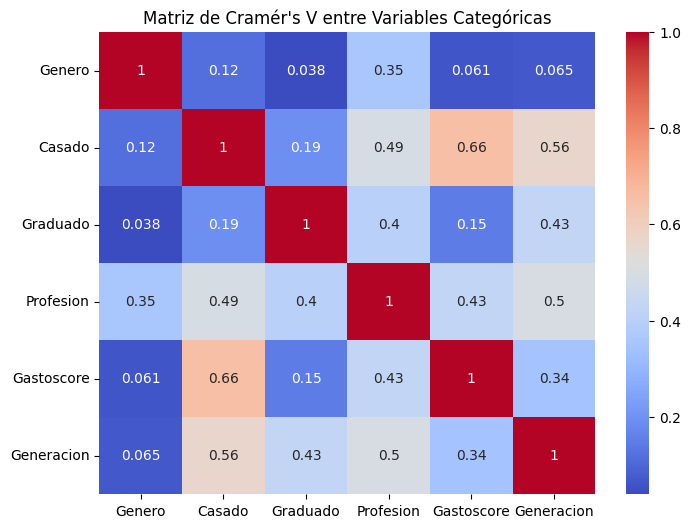

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# 1. Variables a excluir
variables_excluir = ['ID', 'Abandono', 'anno_nacimiento', 'Provincia']  # Excluir redundantes y supervisadas
df = df.drop(columns=variables_excluir)

# 2. Identificación de columnas numéricas y categóricas
variables_numericas = ['Edad', 'Family_Size', 'Ingresos anuales brutos', 'Dias_cliente', 'Digital_encuesta', 'Gasto_medio_mensual_cuota']
variables_categoricas = ['Genero', 'Casado', 'Graduado', 'Profesion', 'Gastoscore','Generacion']

# 3. Normalización de variables numéricas
scaler = StandardScaler()
df[variables_numericas] = scaler.fit_transform(df[variables_numericas])

# 4. Codificación de variables categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
categorical_encoded = encoder.fit_transform(df[variables_categoricas])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(variables_categoricas))

# Combinar datos normalizados y codificados
df_final = pd.concat([df[variables_numericas], categorical_df], axis=1)

# 5. Calcular la matriz de correlación para las variables numéricas
correlation_matrix_numericas = df[variables_numericas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numericas, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# 6. Calcular la "correlación" para las variables categóricas usando Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Crear una matriz vacía para almacenar los resultados de Cramér's V
cramers_v_matrix = pd.DataFrame(index=variables_categoricas, columns=variables_categoricas)

# Calcular Cramér's V entre cada par de variables categóricas
for col1 in variables_categoricas:
    for col2 in variables_categoricas:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Mostrar la matriz de Cramér's V
print("Matriz de Cramér's V entre Variables Categóricas:")
print(cramers_v_matrix)

# (Opcional) Visualizar la matriz de Cramér's V
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap="coolwarm", cbar=True)
plt.title("Matriz de Cramér's V entre Variables Categóricas")
plt.show()


